### NOTAS
- Al querer analizar por estado, hacerlo comparando contra el total de habitantes del estado en 2022
- Comparar gráfico de Strokes y HealthAtacks con lo mismo pero con la otra parte del dataset
- Profundizar con los que se sienten mal los 30 dias del mes
- Histograma de BMIcon BMI30
- Distribucion de enfermedades por genero

# Carga de Datos

In [73]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [74]:
data = pd.read_csv("./data/heart_2022_no_nans.csv")
data.head(10)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 50 to 54,1.85,120.20,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 80 or older,1.63,88.00,33.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.70,78.02,26.94,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.68,63.50,22.60,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# Exploración/Visualización de Datos

In [75]:
pd.DataFrame(data.columns)

,0
0,State
1,Sex
2,GeneralHealth
3,PhysicalHealthDays
4,MentalHealthDays
5,LastCheckupTime
6,PhysicalActivities
7,SleepHours
8,RemovedTeeth
9,HadHeartAttack


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="dark", palette="Set2", color_codes=True, font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,8)

### Genero(Sex) por Categoria de Edad (AgeCategory)

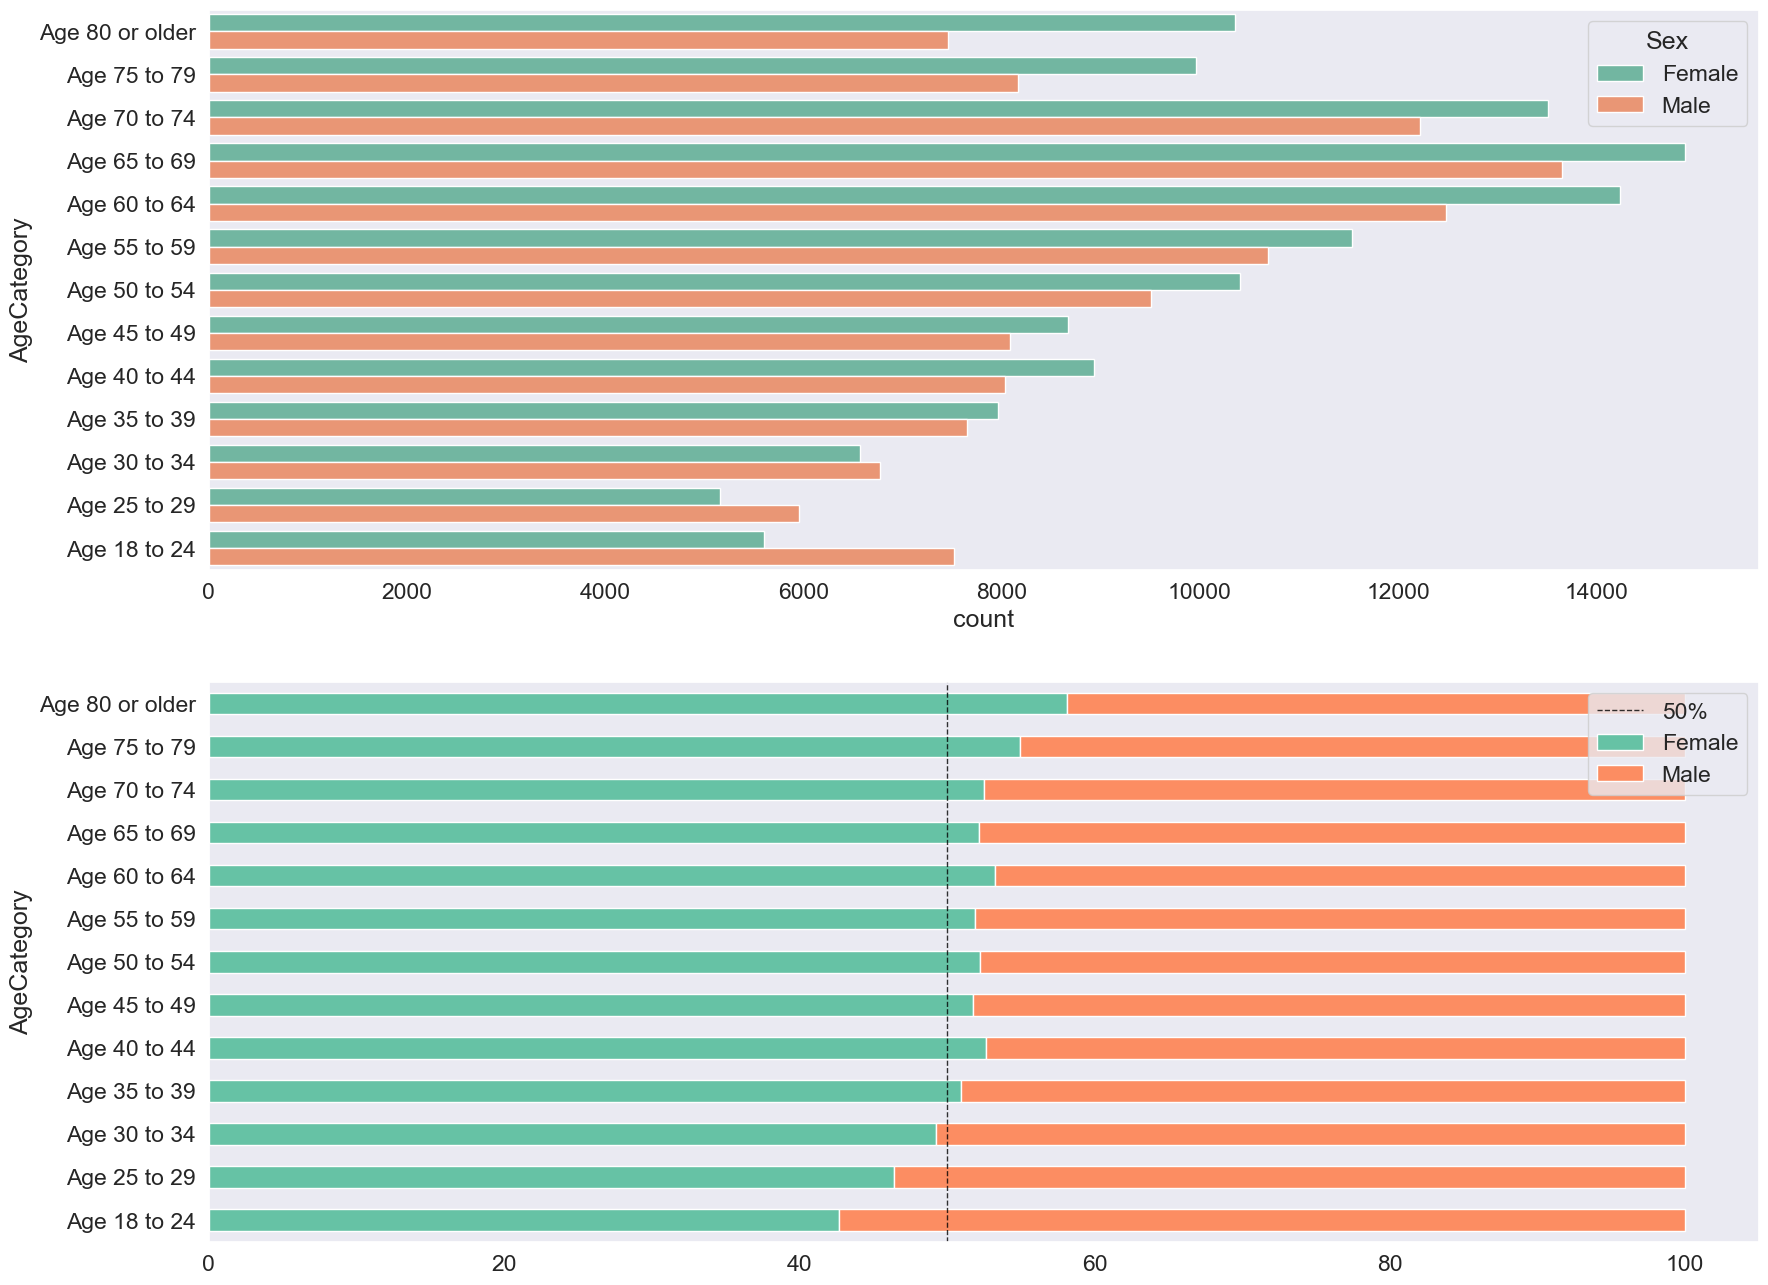

In [77]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 16))
order_of_bars_age = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 
    'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
    'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
    ]
sns.countplot(y='AgeCategory', hue="Sex", data=data, order=order_of_bars_age[::-1], ax=ax1)
total = data.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_age)
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax.axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.8, label='50%')
plt.legend()



### Relación entre peso (WeightInKilograms), altura (HeightInMeters) y el índice de masa comporal (BMI)

<Axes: xlabel='WeightInKilograms', ylabel='HeightInMeters'>

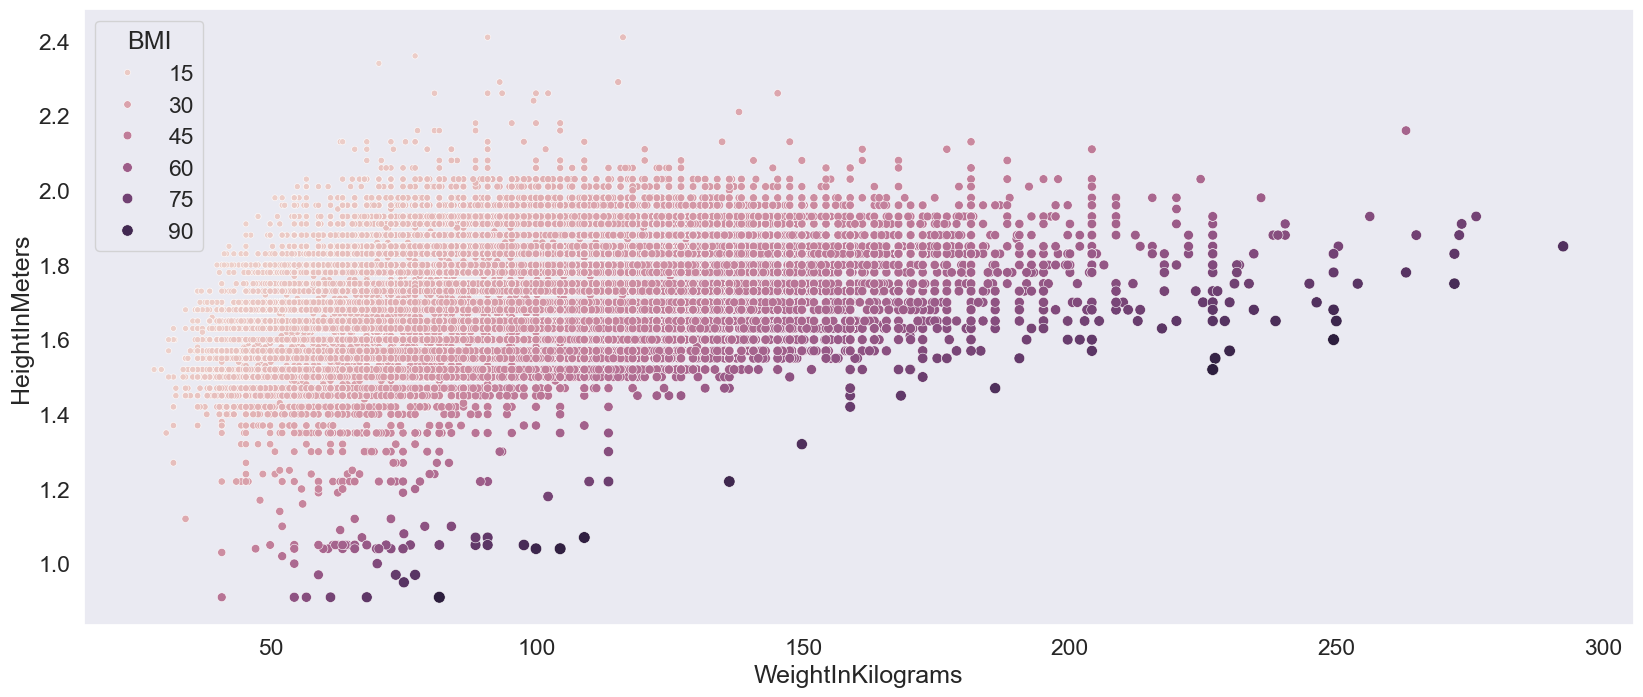

In [78]:
sns.scatterplot(data=data, y='HeightInMeters', x='WeightInKilograms', hue='BMI', size="BMI")


### Casos de BMI mayor a 30 (Obesidad)

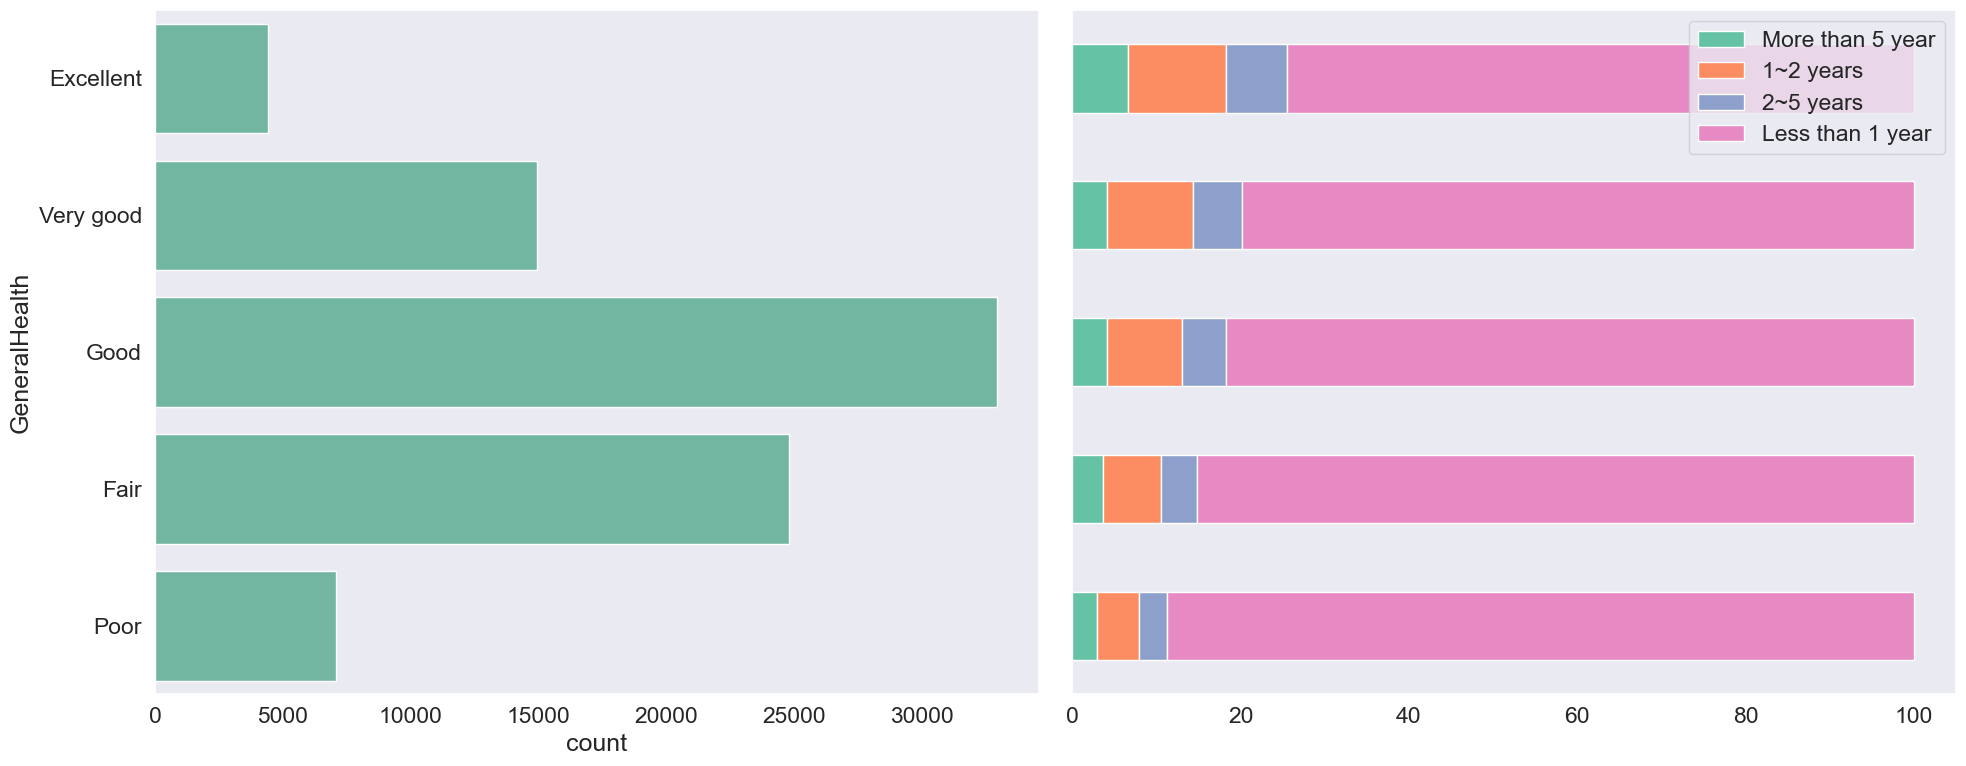

In [79]:
BMI30 = data.loc[data['BMI'] > 30 ] # Obesidad (segun fuentes)
BMI = data.loc[data['BMI'] <= 30 ]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
order_of_bars_feel = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
legend = ['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago']
legend_alias = ['More than 5 year', '1~2 years', '2~5 years', 'Less than 1 year']
sns.countplot(y='GeneralHealth', data=BMI30, order=order_of_bars_feel,ax=ax1)
total = data.groupby(['GeneralHealth','LastCheckupTime']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_feel[::-1])
total[legend]
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax2.legend(legend_alias, loc='upper right')
fig.tight_layout()



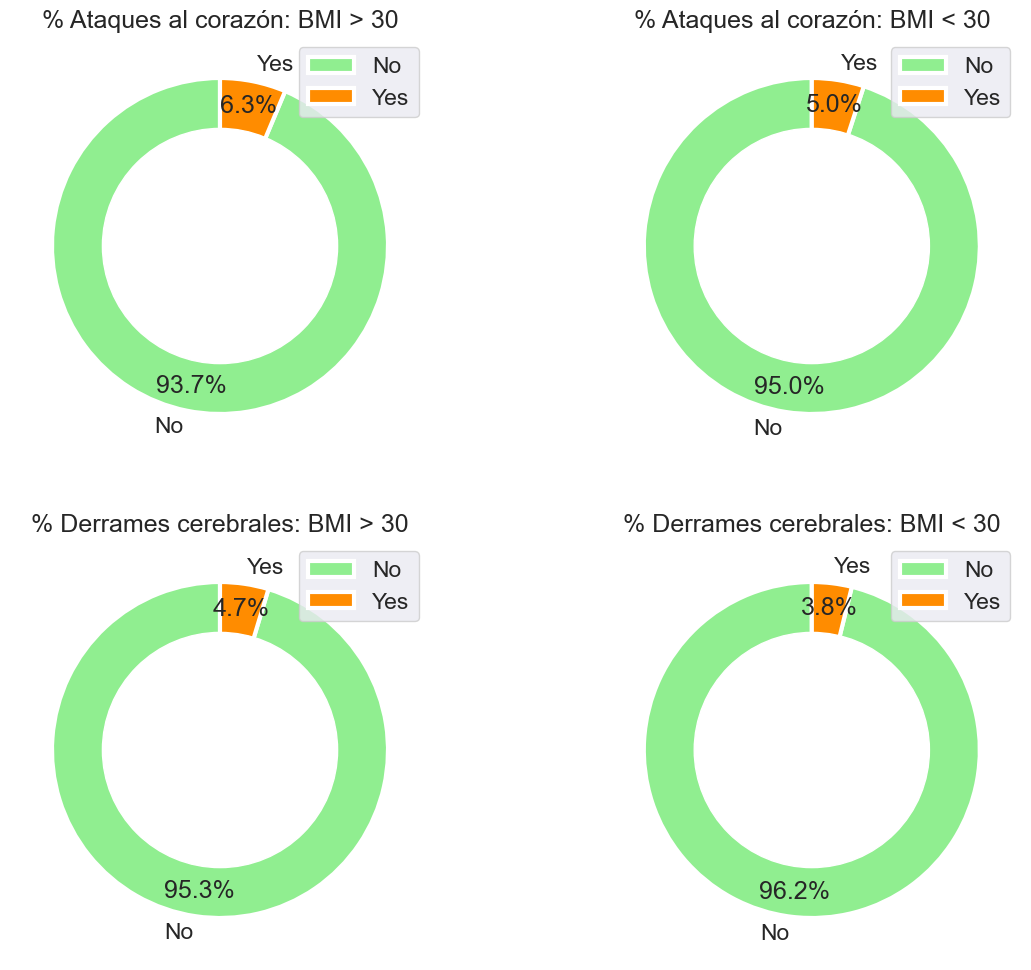

In [80]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(14,12))
colors = ['lightgreen', 'darkorange']

heart_attack = BMI30.groupby(['HadHeartAttack']).size()
ax1.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.legend(labels=['No', 'Yes'], loc='upper right')
ax1.set_title('% Ataques al corazón: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax1.add_artist(my_circle)

heart_attack = BMI.groupby(['HadHeartAttack']).size()
ax2.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.legend(labels=['No', 'Yes'], loc='upper right')
ax2.set_title('% Ataques al corazón: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax2.add_artist(my_circle)

stroke = BMI30.groupby(['HadStroke']).size()
ax3.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.legend(labels=['No', 'Yes'], loc='upper right')
ax3.set_title('% Derrames cerebrales: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax3.add_artist(my_circle)

stroke = BMI.groupby(['HadStroke']).size()
ax4.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax4.legend(labels=['No', 'Yes'], loc='upper right')
ax4.set_title('% Derrames cerebrales: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax4.add_artist(my_circle)

<Axes: xlabel='BMI', ylabel='Count'>

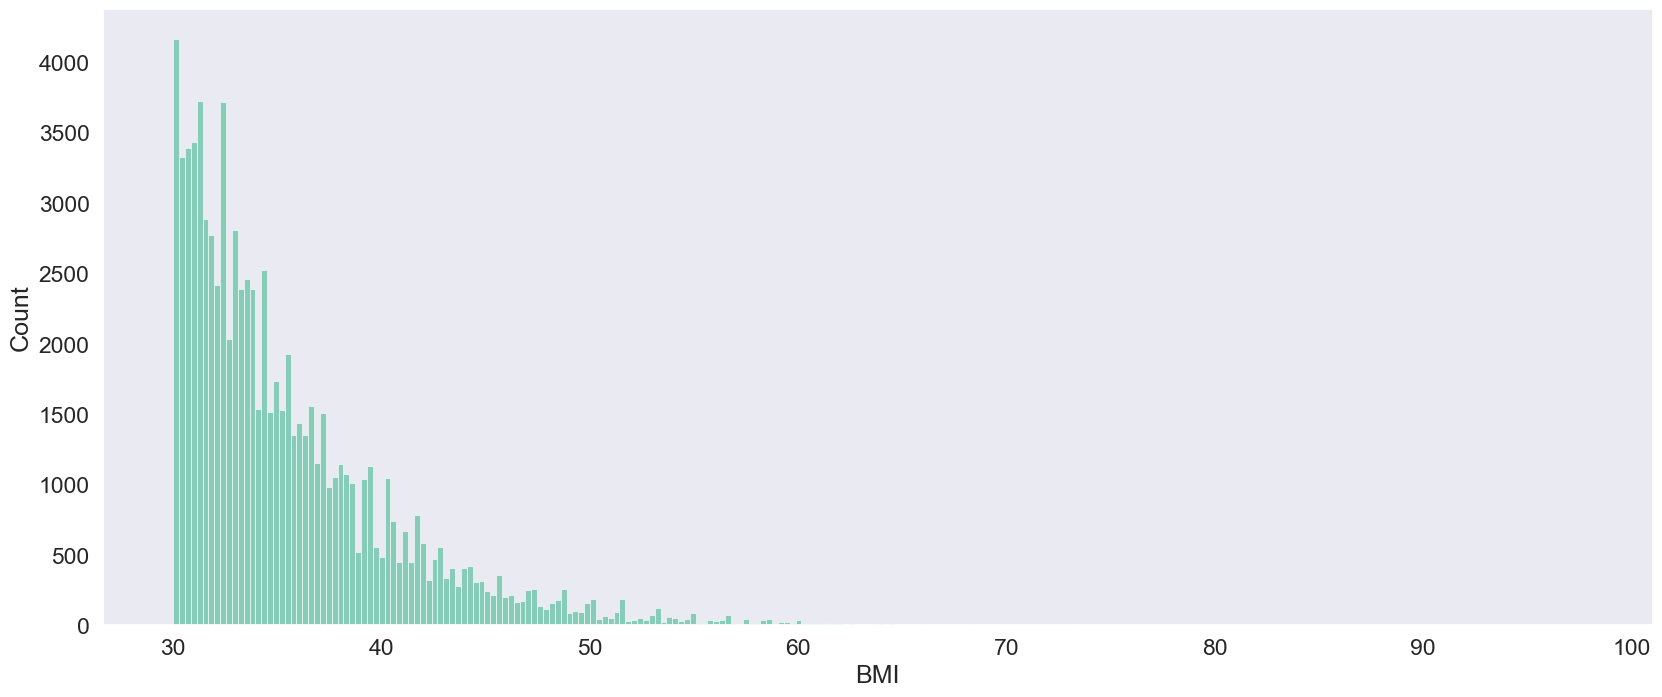

In [81]:
sns.histplot(data=BMI30, x="BMI")

### Casos de 30 dias se sentirse mal (Fisica y mentalmente)

<Axes: xlabel='MentalHealthDays', ylabel='Count'>

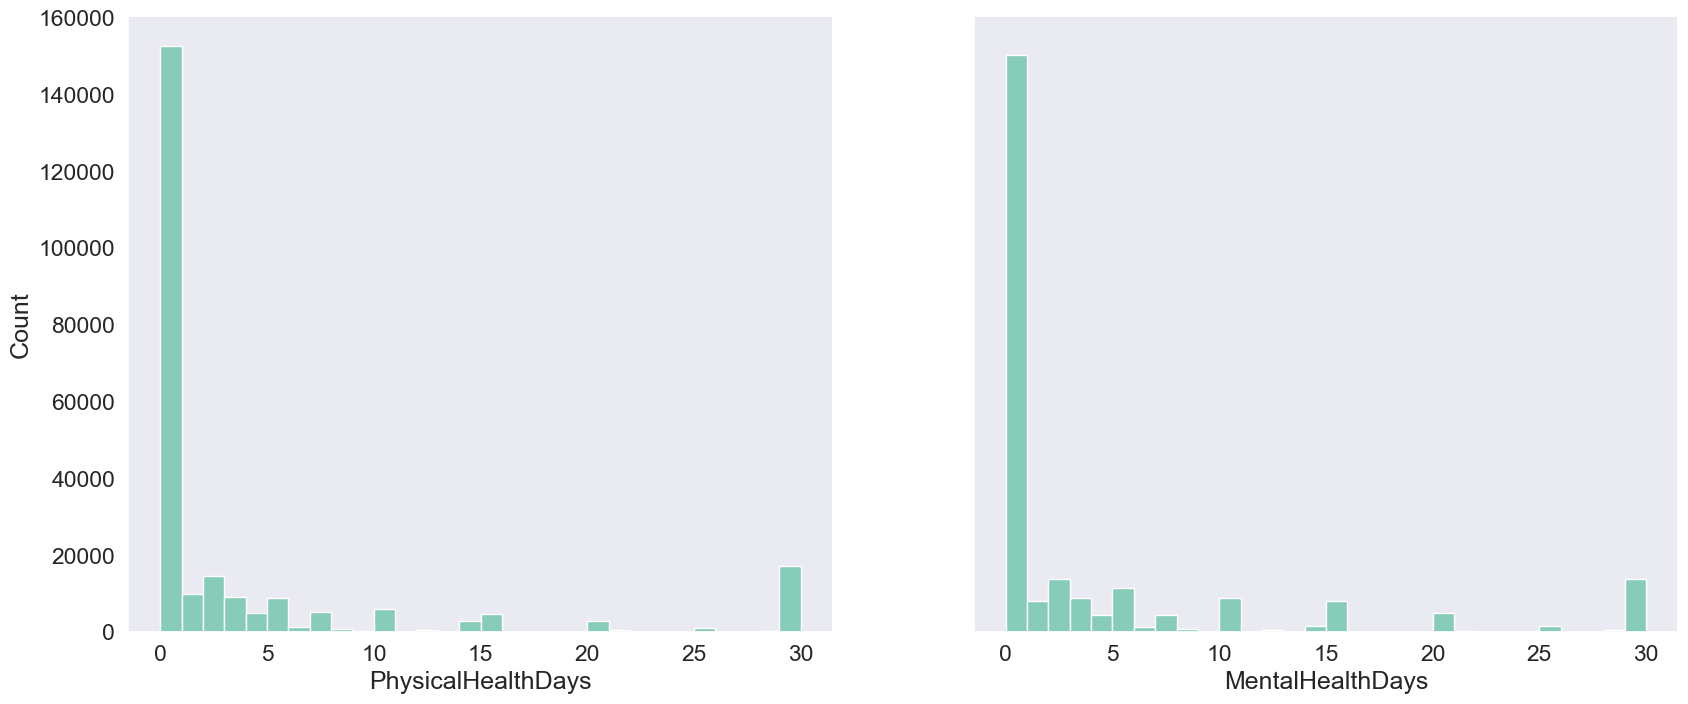

In [82]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)

sns.histplot(data=data, x='PhysicalHealthDays', ax=ax1, binwidth=1)
sns.histplot(data=data, x='MentalHealthDays', ax=ax2, binwidth=1)

In [90]:
PLUS30 = data.loc[data["PhysicalHealthDays"] == 30]
PLUS30 = PLUS30.loc[PLUS30["MentalHealthDays"] == 30]

MINUS30 = data.loc[data["PhysicalHealthDays"] < 30]
MINUS30 = MINUS30.loc[MINUS30["MentalHealthDays"] < 30]

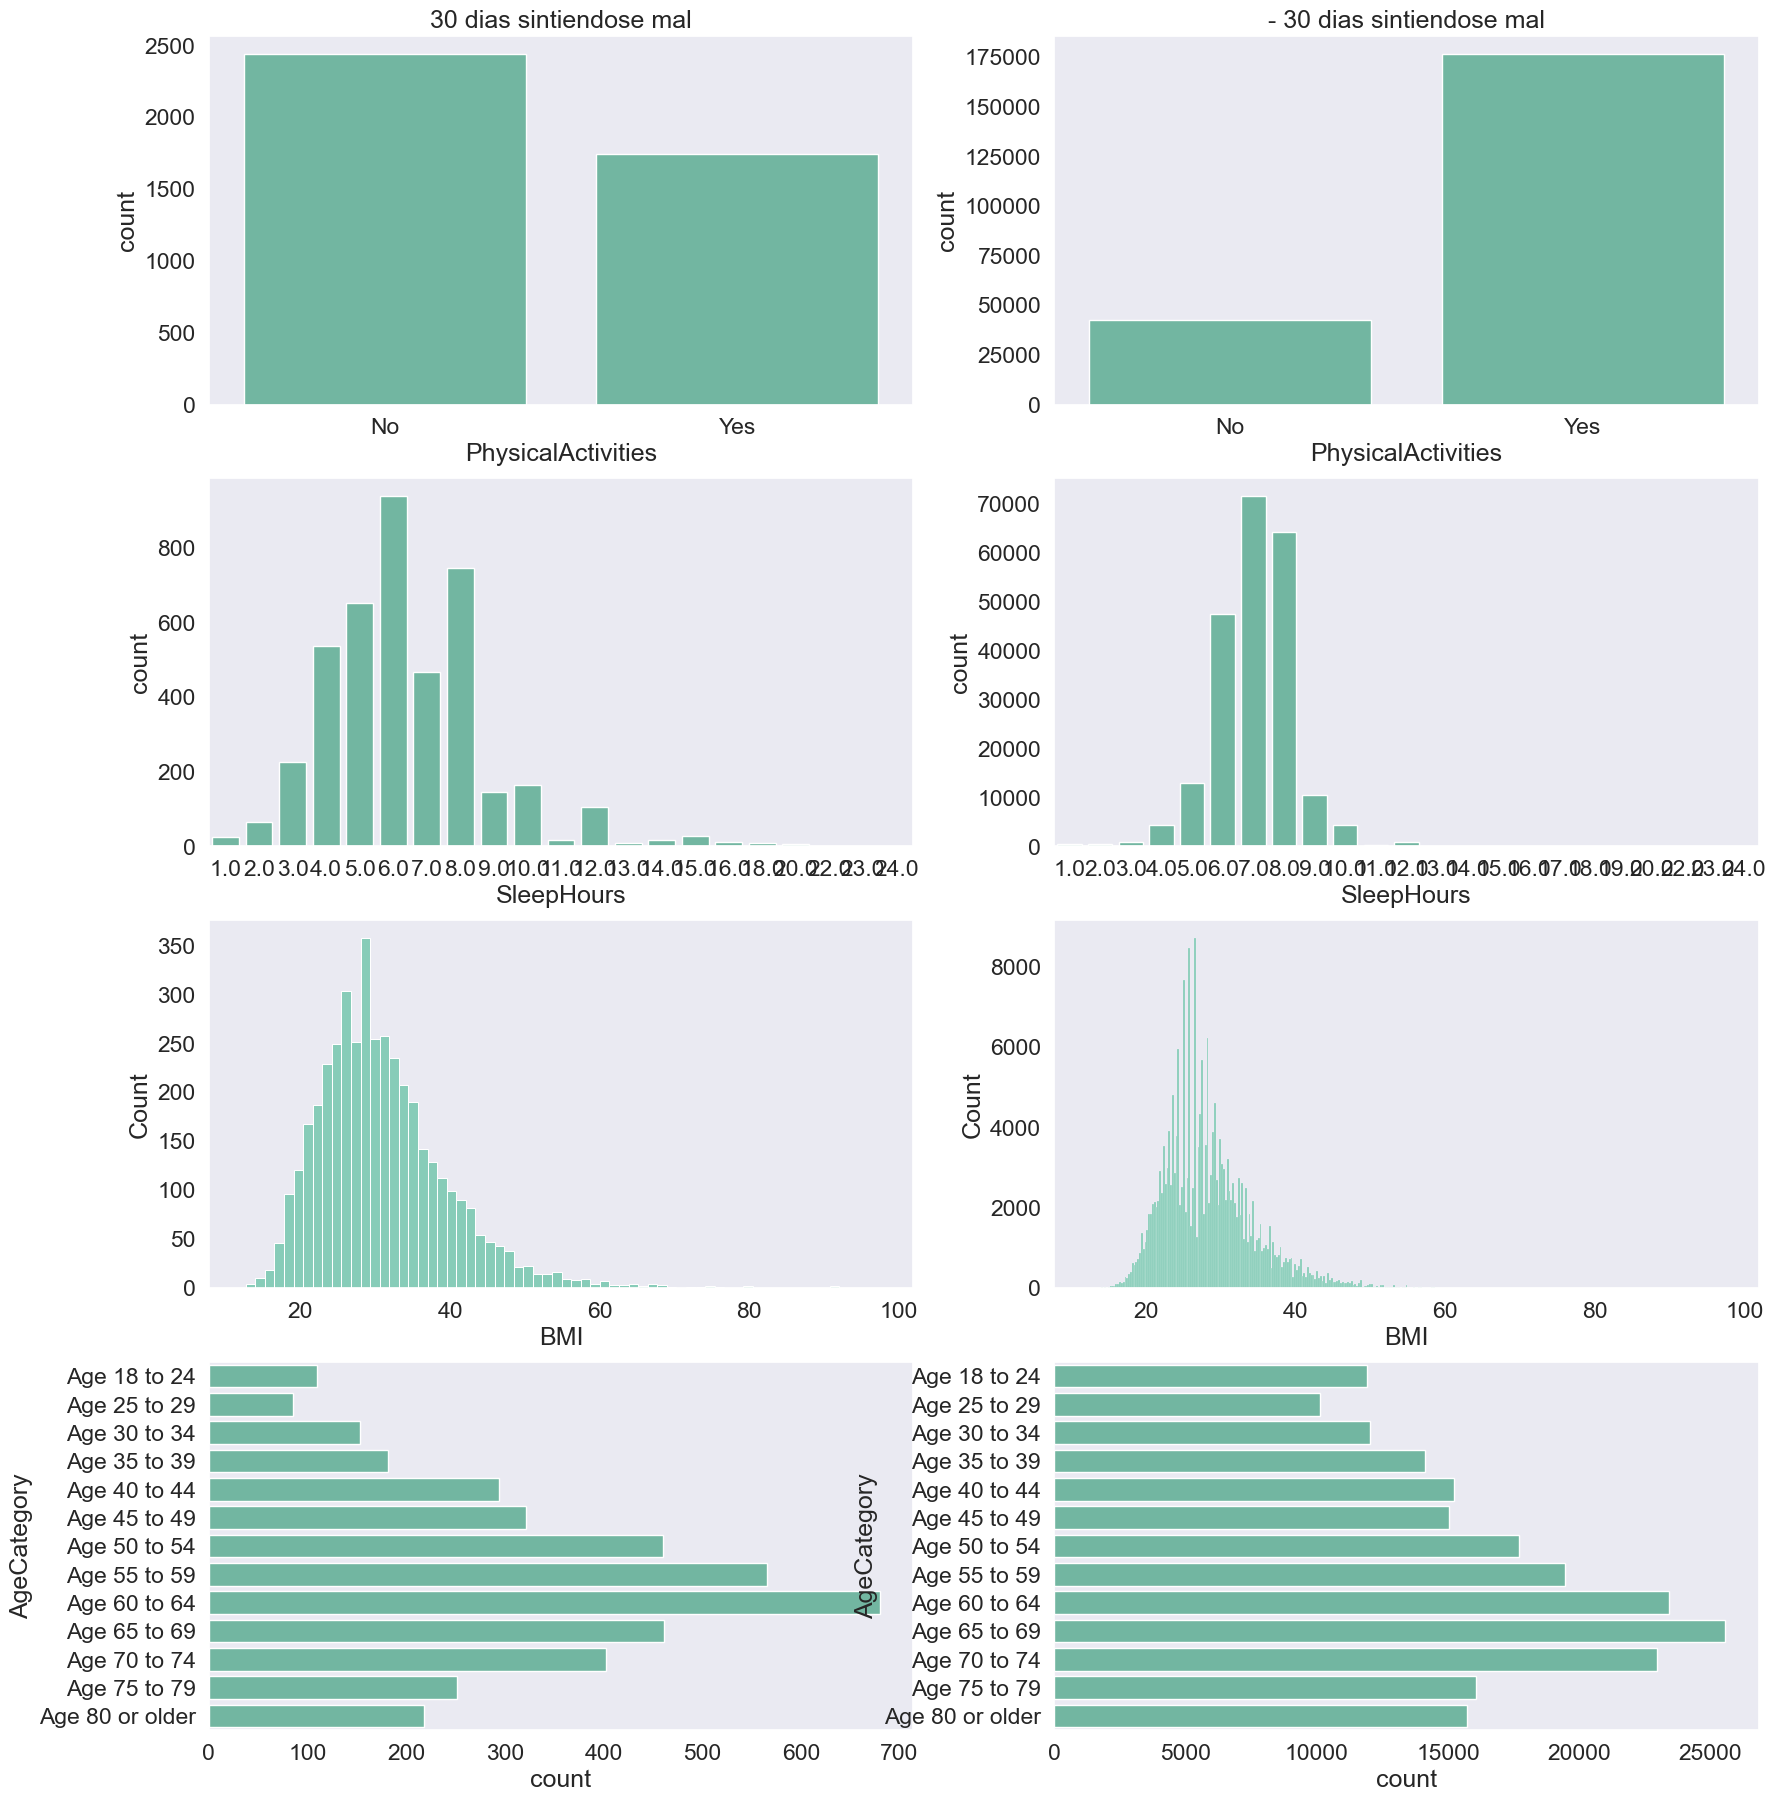

In [117]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,22))


ax1.set_title("30 dias sintiendose mal")
sns.countplot(data=PLUS30, x="PhysicalActivities", ax=ax1)
sns.countplot(data=PLUS30, x="SleepHours", ax=ax3)
sns.histplot(data=PLUS30, x="BMI", ax=ax5)
sns.countplot(data=PLUS30, y="AgeCategory", ax=ax7, order=order_of_bars_age)

ax2.set_title("- 30 dias sintiendose mal")
sns.countplot(data=MINUS30, x="PhysicalActivities", ax=ax2, order=['No', 'Yes'])
sns.countplot(data=MINUS30, x="SleepHours", ax=ax4)
sns.histplot(data=MINUS30, x="BMI", ax=ax6)
sns.countplot(data=MINUS30, y="AgeCategory", ax=ax8, order=order_of_bars_age)

ax5.sharex(ax6)